<a href="https://colab.research.google.com/github/suuungwoo/TensorFlow-Core/blob/master/basic_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [はじめてのニューラルネットワーク：分類問題の初歩](https://www.tensorflow.org/tutorials/keras/classification?hl=ja)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


# ファッションMNISTデータセットのロード

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# データの観察

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

# データの前処理

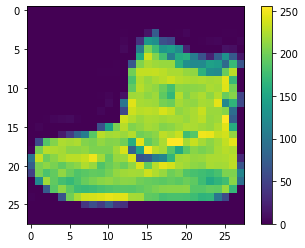

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [0]:
train_images = train_images / 255.0
test_iamges = test_images / 255.0

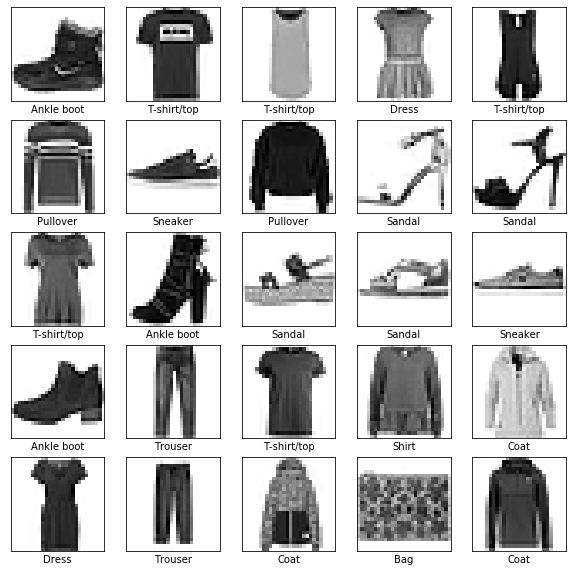

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# モデルの構築

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# モデルの訓練

In [0]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4952 - accuracy: 0.8266
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3707 - accuracy: 0.8661
Epoch 3/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3386 - accuracy: 0.8759
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3117 - accuracy: 0.8863
Epoch 5/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2947 - accuracy: 0.8900


# 正解率の評価

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
test_acc

10000/1 - 0s - loss: 40.6529 - accuracy: 0.8637


0.8637

# 予測する

In [0]:
predictions = model.predict(test_iamges)

In [0]:
predictions[0]

array([8.6182617e-06, 7.6533530e-07, 5.0173344e-07, 9.2808830e-07,
       1.3957930e-07, 9.1600664e-02, 4.5633560e-06, 6.6536061e-02,
       4.6105168e-04, 8.4138662e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10), predictions_array, color='#777777')
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

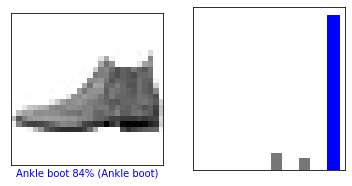

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_iamges)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

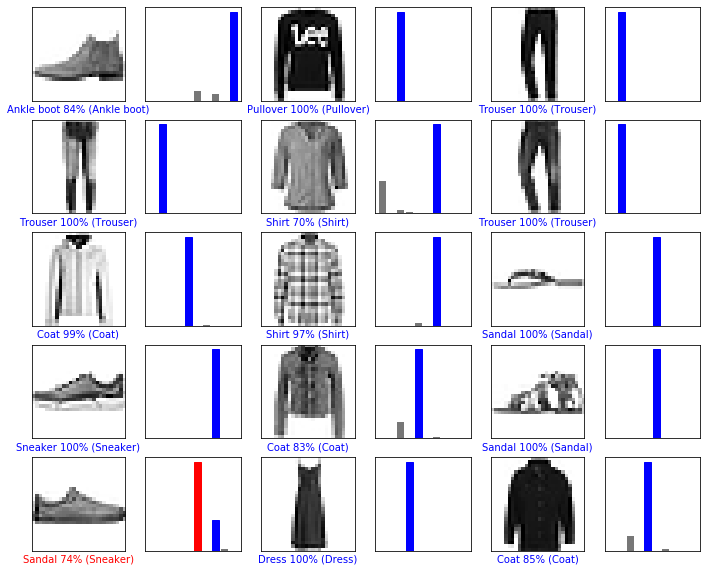

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [0]:
img = test_images[0]
img.shape

(28, 28)

In [0]:
img = (np.expand_dims(img, 0))
img.shape

(1, 28, 28)

In [0]:
predictions_single = model.predict(img)
predictions_single

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

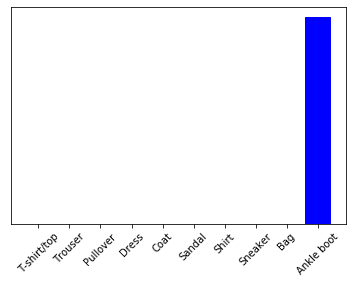

In [0]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()